# Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read in the csv file
df = pd.read_csv('../../../data/chocolate.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


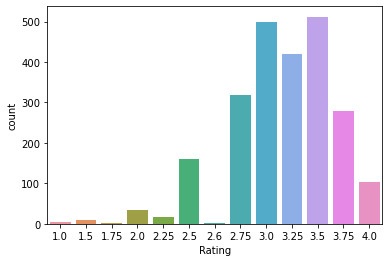

In [3]:
ax = sns.countplot(x="Rating", data=df)

In [4]:
# Change the column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [5]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2362 non-null   int64  
 1   company_(manufacturer)            2362 non-null   object 
 2   company_location                  2362 non-null   object 
 3   review_date                       2362 non-null   int64  
 4   country_of_bean_origin            2362 non-null   object 
 5   specific_bean_origin_or_bar_name  2362 non-null   object 
 6   cocoa_percent                     2362 non-null   object 
 7   ingredients                       2274 non-null   object 
 8   most_memorable_characteristics    2362 non-null   object 
 9   rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


Drop columns that don't relate to rating

In [6]:
# Change the Rating column to a string
df['rating'] = df['rating'].astype(str)

# Use 1's and 0's to find out what is a good rating of chocolate
df['rating'] = [1 if r >= '3.00' else 0 for r in df['rating']]

#  Drop columns to help our model preform
#df = df.drop(['ref', 'specific_bean_origin_or_bar_name', 'most_memorable_characteristics', 'company_location', 'ingredients'], axis=1)
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",1
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",1
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",1
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",1
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",1
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",1
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",1
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",1


In [7]:
# Check the value counts for the 1's and 0's in the rating column
df['rating'].value_counts()

1    1317
0    1045
Name: rating, dtype: int64

In [8]:
# Change the Cocoa Percent to a float
df = df.replace('%', '', regex=True)
df['cocoa_percent'] = df['cocoa_percent'].astype(float)

In [9]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2362 non-null   int64  
 1   company_(manufacturer)            2362 non-null   object 
 2   company_location                  2362 non-null   object 
 3   review_date                       2362 non-null   int64  
 4   country_of_bean_origin            2362 non-null   object 
 5   specific_bean_origin_or_bar_name  2362 non-null   object 
 6   cocoa_percent                     2362 non-null   float64
 7   ingredients                       2274 non-null   object 
 8   most_memorable_characteristics    2362 non-null   object 
 9   rating                            2362 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 184.7+ KB


In [10]:
# Check the new dataframe
df.isna().sum()

ref                                  0
company_(manufacturer)               0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         88
most_memorable_characteristics       0
rating                               0
dtype: int64

In [11]:
df = df.dropna()

# Modeling

In [12]:
# Import packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

In [13]:
# Target
y = df['rating']
# Features
X = df.drop('rating', axis=1)

#### Train-test split

In [14]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=2021)

In [15]:
# Validation Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=2021)

#### Scale the data

In [16]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['ref', 'review_date', 'cocoa_percent']

In [17]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['company_(manufacturer)',
 'company_location',
 'country_of_bean_origin',
 'specific_bean_origin_or_bar_name',
 'ingredients',
 'most_memorable_characteristics']

In [18]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [19]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [20]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [21]:
X_train_scaled

,ref,review_date,cocoa_percent
0,-1.075542,-1.077920,-0.121524
1,0.124508,0.275570,1.421907
2,-1.617455,-1.619316,0.457263
3,-0.990124,-0.807222,0.071405
4,-0.176555,0.004872,0.650192
...,...,...,...
1273,-0.458014,-0.265826,-0.893240
1274,-0.212963,0.004872,1.614836
1275,-0.058931,0.004872,0.264334
1276,1.451984,1.358361,0.071405


#### Encode the categorical data

In [85]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [86]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [87]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [88]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [89]:
X_train_encoded_df

,x0_5150,x0_A. Morin,x0_AMMA,x0_Acalli,x0_Adi aka Fijiana (Easy In Ltd),x0_Aelan,x0_Aequare (Gianduja),x0_Ah Cacao,x0_Akesson's (Pralus),x0_Alain Ducasse,...,"x5_well defined, creamy, cherry","x5_wood, holiday spice, soap","x5_woody, cocoa","x5_woody, coffee,roasted cherry","x5_woody, earthy, medicinal","x5_woody, lemon, mild bitter","x5_woody, meaty, vegetal","x5_woody, nutty, off sour note","x5_woody, red fruit, sour","x5_woody, sweet, unrefined"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [28]:
X_train_df.shape

(1278, 2697)

In [29]:
X_val_df.shape

(427, 2697)

#### First Logistic Regression Model

In [30]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

I created a function to 

In [31]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [32]:
# call modeling function
logreg = modeling_function(logreg, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  0.9702660406885759
Validation accuracy:  0.5901639344262295


The accuracy score looks like there is a lot of varriance.

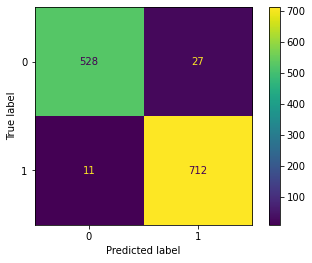

In [33]:
plot_confusion_matrix(logreg, X_train_df, y_train);

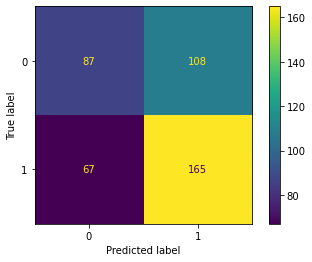

In [34]:
plot_confusion_matrix(logreg, X_val_df, y_val);

#### Use SMOTE to help fix this class imbalance and hopefully improve the model.

In [35]:
y.value_counts()

1    1286
0     988
Name: rating, dtype: int64

In [36]:
sm = SMOTE(random_state=2021)

In [37]:
X_train_res, y_train_res = sm.fit_resample(X_train_df, y_train)

In [38]:
y_train_res.value_counts()

1    723
0    723
Name: rating, dtype: int64

Check the different regularization perameters to test

In [39]:
C = [100, 10, 1, .1, .001]
for c in C:
    lg3 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lg3.fit(X_train_df, y_train)
    print('C:', c)
    print('Training accuracy:', lg3.score(X_train_df, y_train))
    print('Test accuracy:', lg3.score(X_val_df, y_val))
    print('')

C: 100
Training accuracy: 1.0
Test accuracy: 0.5971896955503513

C: 10
Training accuracy: 1.0
Test accuracy: 0.594847775175644

C: 1
Training accuracy: 0.9702660406885759
Test accuracy: 0.5901639344262295

C: 0.1
Training accuracy: 0.7284820031298904
Test accuracy: 0.6088992974238876

C: 0.001
Training accuracy: 0.5938967136150235
Test accuracy: 0.5761124121779859



# Observation

After looking at the first Logistic Regression some things need to be changed to help raise the validation accuracy score. Looking at the features more in depth can help the score. 

#### Second Logistic Regression Model

In [40]:
# Instantiate second LogisticRegression
logreg2 = LogisticRegression()

In [41]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression()

In [42]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.9723374827109267
Validation accuracy:  0.5807962529274004


Using SMOTE didn't change the accuracy score

#### Third Logistic Regression Model
I will be changing the regularization perameters 

In [67]:
logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)

In [68]:
#logreg2.fit(X_train_res, y_train_res)

In [69]:
# Call modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.5836791147994468
Validation accuracy:  0.5878220140515222


#### Desicion Tree Classifier

In [46]:
dt = DecisionTreeClassifier(random_state=2021)

In [47]:
dt = modeling_function(dt, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.5667447306791569


In [48]:
dt2 = DecisionTreeClassifier(random_state=2021, max_depth=10)

In [49]:
dt2 = modeling_function(dt2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.7289073305670816
Validation accuracy:  0.5667447306791569


In [50]:
rf = RandomForestClassifier(random_state=2021)

In [51]:
rf = modeling_function(rf, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  1.0
Validation accuracy:  0.6229508196721312


In [76]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [77]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [78]:
rf_gs.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [79]:
best_model = rf_gs.best_estimator_

In [80]:
rf_gs.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 75}

In [81]:
modeling_function(best_model, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.7621023513139695
Validation accuracy:  0.629976580796253


RandomForestClassifier(max_depth=8, n_estimators=75, random_state=2021)